In [1]:
#NOT FINISHED!
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\rafal\\Desktop\\dane do licencjatu\\data')
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
466,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,54.5,-13.3,-0.35,22369,0.0,0.0,0.0,201920#,NaN,NaN
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,57.8,-20.5,-0.54,56885,0.0,0.0,0.0,201718#,NaN,574.0
4691,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,61.0,-11.9,-0.31,58336,0.0,0.0,0.0,201819#,542.0,NaN
2576,582.0,Aaron Cresswell,eng ENG,DF,West Ham,29.0,1989.0,6000000.0,170.0,Defender - Left-Back,...,61.1,-14.8,-0.39,44155,0.0,0.0,NaN,201920#,NaN,NaN
5688,NaN,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,1500000.0,183.0,midfield - Attacking Midfield,...,52.7,-15.7,-0.46,50656,0.0,0.0,0.0,201718#,NaN,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])
#deleting potential outliers that actually contribute nothing
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,NaN,NaN,0,1,0,0,0,0,0,1
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,NaN,942.0,1,0,0,0,0,1,0,0
7095,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,26.0,1990.0,7000000.0,188.0,midfield - Defensive Midfield,...,NaN,1004.0,1,0,0,0,0,1,0,0
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,NaN,1859.0,1,0,0,0,0,1,0,0
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,NaN,2367.0,1,0,0,0,0,1,0,0


In [4]:
#FORWARDS
dataFWD = data1[data1['position2'].str[:7]=='Forward']
dataFWD

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,NaN,NaN,0,1,0,0,0,0,0,1
8,1212.0,Joselu,es ESP,FW,AlavÄ‚Â©s,29.0,1990.0,5000000.0,191.0,Forward - Centre-Forward,...,NaN,NaN,0,1,0,0,0,0,0,1
16,1631.0,Ä‚â€°dgar MÄ‚Â©ndez,es ESP,"MF,FW",AlavÄ‚Â©s,29.0,1990.0,1600000.0,187.0,Forward - Right Winger,...,NaN,NaN,0,1,0,0,0,0,0,1
19,1950.0,Lucas PÄ‚Â©rez,es ESP,FW,AlavÄ‚Â©s,30.0,1988.0,12000000.0,180.0,Forward - Centre-Forward,...,NaN,NaN,0,1,0,0,0,0,0,1
22,2109.0,Luis Rioja,es ESP,MF,AlavÄ‚Â©s,25.0,1993.0,2000000.0,176.0,Forward - Left Winger,...,NaN,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728,NaN,Ivan Cavaleiro,pt POR,"FW,MF",Wolves,24.0,1993.0,10000000.0,174.0,Forward - Left Winger,...,448.0,NaN,0,0,0,1,0,0,1,0
4730,NaN,HĂ©lder Costa,pt POR,"FW,MF",Wolves,24.0,1994.0,15000000.0,179.0,Forward - Right Winger,...,531.0,NaN,0,0,0,1,0,0,1,0
4734,NaN,RaĂşl JimĂ©nez,mx MEX,FW,Wolves,27.0,1991.0,35000000.0,188.0,Forward - Centre-Forward,...,1169.0,NaN,0,0,0,1,0,0,1,0
4735,NaN,Diogo Jota,pt POR,"FW,MF",Wolves,21.0,1996.0,35000000.0,178.0,Forward - Left Winger,...,1188.0,NaN,0,0,0,1,0,0,1,0


In [5]:
dataFWD_cor = dataFWD.corr()
show=pd.Series(dataFWD_cor['value'])
pd.set_option('display.min_rows', None)
show.sort_values(ascending=False)

value                                     1.000000
gca                                       0.589491
touches_att_pen_area                      0.588161
shots_on_target                           0.580883
touches_att_3rd                           0.576332
W                                         0.574663
goals                                     0.573027
npxg                                      0.563607
gca_passes_live                           0.560104
Pts                                       0.559160
GDiff                                     0.555951
passes_completed_short                    0.552786
Pts/G                                     0.551091
passes_ground                             0.550347
xg                                        0.547100
GF                                        0.543706
passes_received                           0.543528
xGDiff                                    0.542813
passes_short                              0.542285
xGDiff/90                      

In [6]:
def ln(x):
    return np.log(x) + 1.

#Creating a linear regression
trainFWD, testFWD = train_test_split(dataFWD, train_size=0.8)
modelFWD=smf.ols('value~age+goals+assists+shots_total:minutes+passes_pct:minutes+crosses_into_penalty_area:minutes'
                   '+sca_per90'
                   '+errors:minutes+pass_targets:minutes'
                   '+xg_per90+passes_pct+dribbles_vs:minutes+touches_att_pen_area:minutes'
                   '+passes_into_final_third:minutes+passes_ground:minutes'
                   '+gca_dribbles:minutes+crosses+isLaLiga+isPremierLeague+isBundesliga+isSerieA+isLigue1+CL+WinCL+CLBestScorer',data=dataFWD)
resultsFWD=modelFWD.fit()
resultsFWD_params=resultsFWD.params
#Creating a robust regression
modelFWDrobust=sm.RLM(modelFWD.endog,modelFWD.exog,data=trainFWD).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
finalFWD1 = sm.regression.linear_model.OLSResults(modelFWD, 
                                              modelFWDrobust.params, 
                                              modelFWD.normalized_cov_params)
finalFWD1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     69.60
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.24e-186
Time:                        18:21:14   Log-Likelihood:                -16638.
No. Observations:                 930   AIC:                         3.333e+04
Df Residuals:                     905   BIC:                         3.345e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2.419e+07   5.99e+06      4.036      0.000    1.24e+07     3.6e+07
age                               -1.139e+06   1.32e+05     -8.616      0.000    -1.4e+06    -8.8e+05
goals                               1.21e+06   2.12e+05      5.712      0.000    7.94e+05    1.63e+06
assists                                4e+05   2.79e+05      1.432      0.153   -1.48e+05    9.48e+05
shots_total:minutes                 -18.2377     18.920     -0.964      0.335     -55.371      18.895
passes_pct:minutes                  -45.5145     27.825     -1.636      0.102    -100.123       9.094
crosses_into_penalty_area:minutes  -270.0100     90.582     -2.981      0.003    -447.786     -92.234
sca_per90                          4.121e+05   5.64e+05      0.731      0.465   -6.94e+05    1.52e+06
errors:minutes                    -1081.7460    959.120     -1.128      0.260   -2964.103     800.611
pass_targets:minutes                 -7.1779      1.982     -3.621      0.000     -11.068      -3.288
xg_per90                           3.785e+06   3.89e+06      0.972      0.331   -3.86e+06    1.14e+07
passes_pct                         5180.1822   9.19e+04      0.056      0.955   -1.75e+05    1.86e+05
dribbles_vs:minutes                 -90.9090     20.473     -4.440      0.000    -131.089     -50.729
touches_att_pen_area:minutes         56.7047     11.516      4.924      0.000      34.103      79.307
passes_into_final_third:minutes      24.2011     22.929      1.055      0.291     -20.800      69.202
passes_ground:minutes                18.7412      2.910      6.441      0.000      13.031      24.452
gca_dribbles:minutes               -304.1883    237.734     -1.280      0.201    -770.762     162.386
crosses                            1.342e+05   4.63e+04      2.900      0.004    4.34e+04    2.25e+05
isLaLiga                           5.603e+06   1.53e+06      3.660      0.000     2.6e+06    8.61e+06
isPremierLeague                    1.042e+07   1.54e+06      6.757      0.000    7.39e+06    1.34e+07
isBundesliga                       2.471e+06    1.5e+06      1.650      0.099   -4.68e+05    5.41e+06
isSerieA                           3.918e+06   1.71e+06      2.295      0.022    5.67e+05    7.27e+06
isLigue1                           1.783e+06   1.53e+06      1.167      0.243   -1.22e+06    4.78e+06
CL                                  1.29e+07   1.43e+06      9.047      0.000    1.01e+07    1.57e+07
WinCL                              1.168e+07   4.51e+06      2.589      0.010    2.83e+06    2.05e+07
CLBestScorer                       1.675e+07   1.11e+07      1.512      0.131   -4.99e+06    3.85e+07
==============================================================================
Omnibus:                      670.174   Durbin

In [7]:
#Creating a robust regression
#modelGKrobust=sm.RLM(modelGK.endog,modelGK.exog,data=trainGK).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
#finalGK1 = sm.regression.linear_model.OLSResults(modelGK, 
                                              #modelGKrobust.params, 
                                              #modelGK.normalized_cov_params)
#print(finalGK1.summary())

In [8]:
#Creating a robust ridge regression
modelFWDrobustridge = sm.WLS(modelFWD.endog, modelFWD.exog, weights=modelFWDrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsFWD_params)

finalFWD2 = sm.regression.linear_model.OLSResults(modelFWD, 
                                              modelFWDrobustridge.params, 
                                              modelFWD.normalized_cov_params)
print(finalFWD2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     58.57
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.27e-165
Time:                        18:21:14   Log-Likelihood:                -16688.
No. Observations:                 930   AIC:                         3.343e+04
Df Residuals:                     905   BIC:                         3.355e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [9]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["features"] = modelFWD.exog_names
vif["VIF Factor"] = [variance_inflation_factor(finalFWD1.model.exog, i) for i in range(finalFWD1.model.exog.shape[1])]
vif

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,Intercept,0.000000
1,age,1.128440
2,goals,6.069717
3,assists,2.718857
4,shots_total:minutes,12.416872
5,passes_pct:minutes,13.213456
6,crosses_into_penalty_area:minutes,5.639109
7,sca_per90,1.943935
8,errors:minutes,1.076678
9,pass_targets:minutes,43.206844


In [10]:
#testing
#Breusch-Pagan
bptestFWD=sm.stats.diagnostic.het_breuschpagan(resultsFWD.resid, resultsFWD.model.exog)
bptestFWD

(206.26072346166112,
 1.9034488332217243e-30,
 10.746616034254695,
 1.7354276023643094e-35)

In [11]:
#autocorrelation
sm.stats.stattools.durbin_watson(resultsFWD.resid)

1.5928462773511245

In [12]:
#Chowtest
trainFWD1=trainFWD[trainFWD['Season_201819#']==0]
trainFWD2=trainFWD[trainFWD['Season_201819#']==1]
JFWD = len(resultsFWD.params)-1 #number of coefficients
N1FWD = trainFWD1.shape[0]
N2FWD = trainFWD2.shape[0]
RSSdFWD=resultsFWD.ssr
resultsFWDridge1=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainFWD1).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSbFWD=resultsFWDridge1.ssr
kFWD = len(resultsFWDridge1.params)-1
resultsFWDridge2=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainFWD2).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSnbFWD = resultsFWDridge2.ssr
ChowFWD=((RSSdFWD-(RSSbFWD+RSSnbFWD))/JFWD)/((RSSbFWD+RSSnbFWD)/(N1FWD+N2FWD-2*kFWD))
pFWD=sp.stats.f.cdf(ChowFWD, JFWD, N1FWD+N2FWD-2*kFWD)
print(ChowFWD,pFWD,JFWD)

-14.170602725765992 0.0 25


In [13]:
#endogeneity
from statsmodels.sandbox.regression.gmm import IV2SLS
resultsFWDridgeendog=IV2SLS(resultsFWD.model.endog, resultsFWD.model.exog, instrument=dataFWD['minutes']).fit()
resultsFWDridgeendog.summary()
resultsFWDridgeendog.spec_hausman()

<AxesSubplot:>

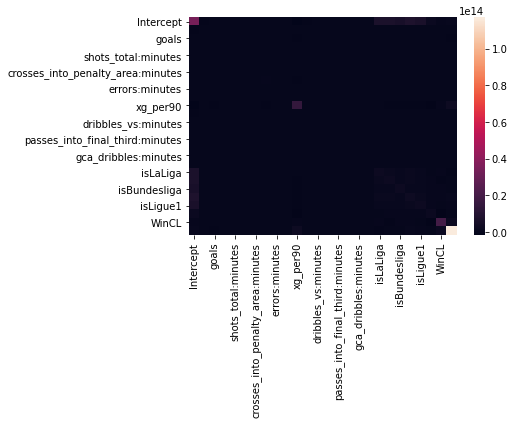

In [14]:
#correlation matrix
sm.regression.linear_model.RegressionResults.cov_params(resultsFWD)
sns.heatmap(sm.regression.linear_model.RegressionResults.cov_params(resultsFWD),annot=False,fmt='g')
#dataFWD_cor = dataFWD.corr()

In [15]:
#evaluating predictions
predictionsFWD=finalFWD1.predict(dataFWD)
FWDpredtrain=finalFWD1.predict(trainFWD)
FWDpredtest=finalFWD1.predict(testFWD)
rmsetrainFWD=sm.tools.eval_measures.rmse(trainFWD['value'],FWDpredtrain)
rmsetestFWD=sm.tools.eval_measures.rmse(testFWD['value'],FWDpredtest)
print(rmsetrainFWD,rmsetestFWD)

nan nan


In [16]:
#cross validation
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
print(cross_val_score(SMWrapper(sm.OLS), modelFWD.exog, modelFWD.endog, scoring='neg_mean_squared_error'))

[-1.57766494e+14 -2.48390477e+14 -2.10195739e+14 -1.92176433e+14
 -2.79575995e+14]


In [17]:
#some dope plots and other stuff
#multicollinearity
np.linalg.cond(resultsFWD.model.exog)

2.158602450059828e+22

<AxesSubplot:>

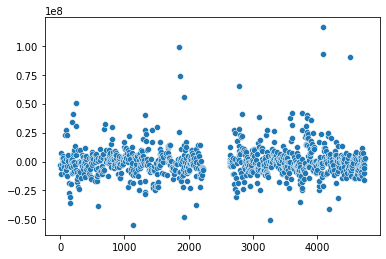

In [18]:
sns.scatterplot(data=resultsFWD.resid)

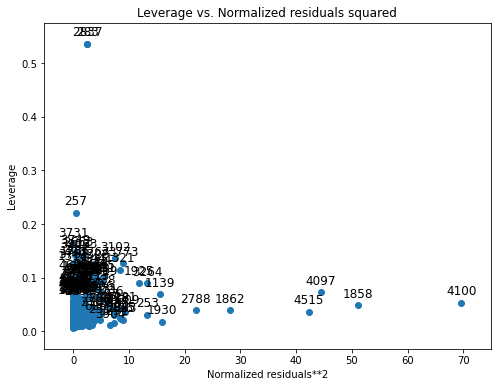

In [19]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(resultsFWD, ax = ax)

In [20]:
#Actual predictions
dataFWD['preds']=predictionsFWD
dataseason1920=dataFWD[dataFWD['Season_201920#']==1]
dataFWD.sort_values('preds',ascending=False)[0:25]

<ipython-input-20-363a8e4f8af4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFWD['preds']=predictionsFWD


,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,preds
2837,NaN,Lionel Messi,ar ARG,FW,Barcelona,31.0,1987.0,150000000.0,170.0,Forward - Right Winger,...,NaN,0,1,0,0,0,0,1,0,1.231480e+08
257,1649.0,Lionel Messi,ar ARG,"FW,MF",Barcelona,32.0,1987.0,112000000.0,170.0,Forward - Right Winger,...,NaN,0,1,0,0,0,0,0,1,1.050709e+08
3102,NaN,Eden Hazard,be BEL,FW,Chelsea,27.0,1991.0,150000000.0,175.0,Forward - Left Winger,...,NaN,0,0,0,1,0,0,1,0,1.034048e+08
3831,NaN,Raheem Sterling,eng ENG,FW,Manchester City,23.0,1994.0,140000000.0,170.0,Forward - Left Winger,...,NaN,0,0,0,1,0,0,1,0,1.028768e+08
3773,NaN,Mohamed Salah,eg EGY,FW,Liverpool,26.0,1992.0,150000000.0,175.0,Forward - Right Winger,...,NaN,0,0,0,1,0,0,1,0,1.019342e+08
1430,2399.0,Raheem Sterling,eng ENG,FW,Manchester City,24.0,1994.0,128000000.0,170.0,Forward - Left Winger,...,NaN,0,0,0,1,0,0,0,1,9.314517e+07
4097,NaN,Kylian MbappĂ©,fr FRA,FW,Paris S-G,19.0,1998.0,200000000.0,178.0,Forward - Left Winger,...,NaN,0,0,1,0,0,0,1,0,8.906450e+07
1328,2207.0,Mohamed Salah,eg EGY,FW,Liverpool,27.0,1992.0,120000000.0,175.0,Forward - Right Winger,...,NaN,0,0,0,1,0,0,0,1,8.805776e+07
1139,1154.0,Ciro Immobile,it ITA,FW,Lazio,29.0,1990.0,40000000.0,185.0,Forward - Centre-Forward,...,NaN,0,0,0,0,1,0,0,1,8.663253e+07
3767,NaN,Sadio ManĂ©,sn SEN,FW,Liverpool,26.0,1992.0,120000000.0,174.0,Forward - Left Winger,...,NaN,0,0,0,1,0,0,1,0,8.408439e+07
